In [2]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to binary classification
train_images_binary = np.zeros_like(train_images)
test_images_binary = np.zeros_like(test_images)

# Apply binary thresholding to each image
threshold = 0.5
train_images_binary[train_images > threshold] = 1
test_images_binary[test_images > threshold] = 1

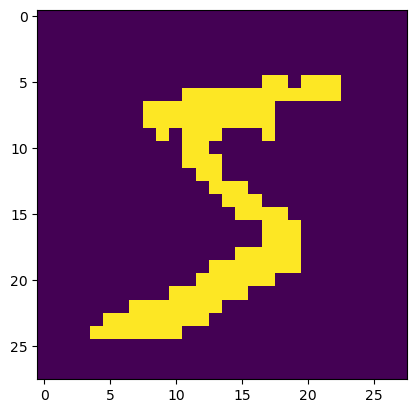

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_images_binary[0])

In [4]:
train_images_binary[0, 8]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
train_images_flat = train_images_binary.reshape(train_images.shape[0], -1)
test_images_flat = test_images_binary.reshape(test_images.shape[0], -1)

In [6]:
for i in range(28*8, 28*9):
   print(train_images_flat[0][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [7]:
train_images_flat.shape

(60000, 784)

In [8]:
train_images_reshaped = train_images_flat.reshape(train_images_flat.shape[0], 196, 4)
test_images_reshaped = test_images_flat.reshape(test_images_flat.shape[0], 196, 4)

In [9]:
reading_mapping = {
    (0, 0, 0, 0): [0, 0, 0, 0],
    (0, 0, 0, 1): [0, 0, 0, 7.58],
    (0, 0, 1, 0): [0, 0, 7.97, 0],
    (0, 0, 1, 1): [0, 0, 7.97, 21.74],
    (0, 1, 0, 0): [0, 7.58, 0, 0],
    (0, 1, 0, 1): [0, 6.68, 0, 17.24],
    (0, 1, 1, 0): [0, 7.58, 21.91, 1.91],
    (0, 1, 1, 1): [0, 7.58, 22.19, 39.04],
    (1, 0, 0, 0): [5.64, 0, 0, 0],
    (1, 0, 0, 1): [4.19, 0, 0, 14.88],
    (1, 0, 1, 0): [4.80, 0, 16.56, 1.06],
    (1, 0, 1, 1): [4.80, 0, 16.56, 33.74],
    (1, 1, 0, 0): [5.64, 20.91, 1.52, 0.38],
    (1, 1, 0, 1): [5.49, 19.23, 1.22, 28.39],
    (1, 1, 1, 0): [5.64, 20.91, 38.77, 5.80],
    (1, 1, 1, 1): [5.64, 20.91, 38.77, 57.86]
}

# Accessing values from the dictionary
key = (0, 0, 1, 1)
value = reading_mapping[key]
print(value)

[0, 0, 7.97, 21.74]


In [10]:
for i in range(len(train_images_reshaped)):
    for j in range(len(train_images_reshaped[i])):
        # Convert the 4-bit binary sequence to tuple key
        binary_sequence = tuple(train_images_reshaped[i, j])

        # Replace the sequence using the reading_mapping mappings
        if binary_sequence in reading_mapping:
            train_images_reshaped[i, j] = np.array(reading_mapping[binary_sequence])

# Verify the updated train_image_reshape array
print(train_images_reshaped)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [11]:
for i in range(len(test_images_reshaped)):
    for j in range(len(test_images_reshaped[i])):
        # Convert the 4-bit binary sequence to tuple key
        binary_sequence = tuple(test_images_reshaped[i, j])

        # Replace the sequence using the reading_mapping mappings
        if binary_sequence in reading_mapping:
            test_images_reshaped[i, j] = np.array(reading_mapping[binary_sequence])

# Verify the updated train_image_reshape array
print(test_images_reshaped)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [12]:
train_image_combined = train_images_reshaped.reshape(len(train_images_reshaped), -1)
test_image_combined = test_images_reshaped.reshape(len(test_images_reshaped), -1)

# Verify the shape of the updated array
print(train_image_combined.shape)

(60000, 784)


In [13]:
for i in range(28*8, 28*9):
   print(train_image_combined[0][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.64
20.91
38.77
57.86
5.64
20.91
38.77
57.86
5.64
20.91
1.52
0.38
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [33]:
import tensorflow as tf 

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics="accuracy",)

history = model.fit(train_image_combined, train_labels,batch_size=32, epochs=100, validation_data=(test_image_combined, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 576us/step - loss: 3.6153 - accuracy: 0.6215 - val_loss: 1.3983 - val_accuracy: 0.7926
Epoch 2/100
1875/1875 [==============================] - 1s 466us/step - loss: 1.2069 - accuracy: 0.8117 - val_loss: 0.9542 - val_accuracy: 0.8364
Epoch 3/100
1875/1875 [==============================] - 1s 424us/step - loss: 0.8738 - accuracy: 0.8444 - val_loss: 0.7577 - val_accuracy: 0.8575
Epoch 4/100
1875/1875 [==============================] - 1s 425us/step - loss: 0.7057 - accuracy: 0.8613 - val_loss: 0.6602 - val_accuracy: 0.8675
Epoch 5/100
1875/1875 [==============================] - 1s 426us/step - loss: 0.6013 - accuracy: 0.8708 - val_loss: 0.5867 - val_accuracy: 0.8748
Epoch 6/100
1875/1875 [==============================] - 1s 426us/step - loss: 0.5302 - accuracy: 0.8792 - val_loss: 0.5342 - val_accuracy: 0.8797
Epoch 7/100
1875/1875 [==============================] - 1s 437us/step - loss: 0.4790 - accuracy: 0.8854 - val_loss: 0

<Axes: >

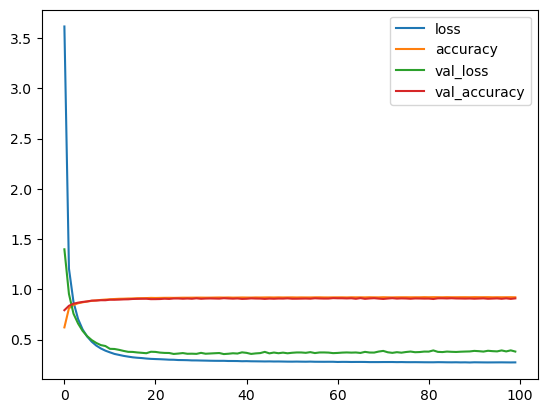

In [38]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [39]:
predictions = model.predict(test_image_combined)

313/313 [==============================] - 0s 329us/step


In [42]:
model.evaluate(test_image_combined, test_labels)

313/313 [==============================] - 0s 389us/step - loss: 0.3811 - accuracy: 0.9101


[0.38109534978866577, 0.910099983215332]